In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd
from geopandas.tools import sjoin
import gspatial_plot as gsp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable

import calendar

In [2]:
states = gpd.read_file("Intern Assignment/us_states.geojson")

In [3]:
states
# ALAND - Land Area
# AWATER - Water Area
# NAME - State Name

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"MULTIPOLYGON (((-96.62188 42.77925, -96.57794 ..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.77379 39.72220, -75.75323 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"MULTIPOLYGON (((-80.51989 40.90666, -80.51964 ..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"MULTIPOLYGON (((-104.05314 41.11446, -104.0524..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.46866 31.89386, -88.46866 ..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"MULTIPOLYGON (((-94.61792 36.49941, -94.36120 ..."


In [4]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   52 non-null     object  
 1   STATENS   52 non-null     object  
 2   AFFGEOID  52 non-null     object  
 3   GEOID     52 non-null     object  
 4   STUSPS    52 non-null     object  
 5   NAME      52 non-null     object  
 6   LSAD      52 non-null     object  
 7   ALAND     52 non-null     int64   
 8   AWATER    52 non-null     int64   
 9   geometry  52 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.2+ KB


In [5]:
states.describe()

,ALAND,AWATER
count,5.200000e+01,5.200000e+01
mean,1.761211e+11,1.327167e+10
std,2.207041e+11,3.626659e+10
min,1.583404e+08,1.868720e+07
25%,7.938180e+10,1.746214e+09
50%,1.368590e+11,3.898064e+09
75%,2.076105e+11,1.063828e+10
max,1.478840e+12,2.454816e+11


In [6]:
# get all the states except those mentioned in the list because
# even though they are a part of the United States, some are not located within the contiguous United States.
# Guam is a U.S. territory located in the western Pacific Ocean.
# American Samoa is a U.S. territory located in the South Pacific Ocean.
# The Commonwealth of the Northern Mariana Islands is a U.S. territory located in the western Pacific Ocean.
# Alaska is a state located in the far northwestern part of North America, separated from the contiguous United States by Canada.
# Hawaii is a state located in the middle of the Pacific Ocean, approximately 2,400 miles southwest of California.

states = states[
    ~states["NAME"].isin(
        [
            "Guam",
            "American Samoa",
            "Commonwealth of the Northern Mariana Islands",
            "Alaska",
            "Hawaii"
        ]
    )
]

In [7]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   50 non-null     object  
 1   STATENS   50 non-null     object  
 2   AFFGEOID  50 non-null     object  
 3   GEOID     50 non-null     object  
 4   STUSPS    50 non-null     object  
 5   NAME      50 non-null     object  
 6   LSAD      50 non-null     object  
 7   ALAND     50 non-null     int64   
 8   AWATER    50 non-null     int64   
 9   geometry  50 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.3+ KB


In [8]:
# Coordinate Reference System (CRS)
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fires = gpd.read_file("Intern Assignment/Monitoring_Trends_in_Burn_Severity _Fire_Occurrence_Locations_and_Burned_Area_Boundaries.geojson")

In [10]:
fires
# FIRE_TYPE - Type of Fire
# IG_DATE - Datetime
# ACRES - Acres Burnt

,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,...,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS,geometry
0,526496,AL3276508694720210320,Initial,802003720210313,802003720210329,-970,70,9999,9999,32.776,...,2021-03-20 00:00:00+00:00,1966,F512DED1-3A47-40F9-AA5C-AA8ECB5555E5,10021865,MTBS,NaN,34,17,NaN,POINT (-86.94711 32.77450)
1,526497,AL3279308700220211120,Initial,B16SDB20211115_30m,A16SDB20211123_30m,-970,80,9999,9999,32.785,...,2021-11-20 00:00:00+00:00,578,D7A20B61-04AA-42FE-ABCA-865F129167EE,10022026,MTBS,NaN,65,31,AL3277908698120211116 is a duplicate of this f...,POINT (-87.00658 32.78629)
2,526498,AL3290408705120210321,Initial,B16SDB20210320_30m,B16SDB20210402_30m,-970,10,9999,9999,32.911,...,2021-03-21 00:00:00+00:00,1313,9ECE2635-8788-4E37-91A7-82FA3C45EEEA,10021855,MTBS,NaN,-12,20,NaN,POINT (-87.05778 32.90670)
3,526499,AL3314708607620210419,Initial,A16SEB20200509_30m,B16SEB20210509_30m,-970,20,9999,9999,33.151,...,2021-04-19 00:00:00+00:00,1826,E18DFB2D-271E-4ECE-953A-B7BC5CFE6718,10021921,MTBS,NaN,-8,15,NaN,POINT (-86.08856 33.14911)
4,526500,AL3315508618420211119,Initial,B16SEB20201120_30m,B16SEB20211125_30m,-970,90,9999,9999,33.156,...,2021-11-19 00:00:00+00:00,670,CB27E9BA-2B5D-4128-B92B-A38AE1246C81,10021983,MTBS,NaN,25,31,NaN,POINT (-86.18762 33.15883)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,527038,WA4828511853120210713,Extended,804402620210711,804402620220714,-970,50,308,590,48.372,...,2021-07-13 00:00:00+00:00,54855,BE99D67C-9EF1-4674-91E9-8F97B77EAFCC,10022602,MTBS,NaN,4,43,Perimeter delineated by using the following im...,POINT (-118.46878 48.38700)
543,527039,WA4856812048820210708,Extended,804502620210702,904502620220729,-970,20,262,525,48.505,...,2021-07-08 00:00:00+00:00,58591,46E71AE7-7787-48B3-B584-9D63F43FA071,10022517,MTBS,NaN,-21,29,Perimeter delineated by using the following im...,POINT (-120.40964 48.51406)
544,527040,MT4568311385420210708,Extended,804102820210706,904102820220717,-970,55,315,600,45.624,...,2021-07-08 00:00:00+00:00,62432,07C75421-ED46-4D0C-90A7-9B89F6C80A9B,10022470,MTBS,NaN,8,19,NaN,POINT (-113.78182 45.62594)
545,527041,WA4855212019420210716,Extended,804502620210702,804502620220806,-970,60,252,480,48.672,...,2021-07-16 00:00:00+00:00,74601,A0A9789D-7AC2-4784-8AD3-B348CF5E64DD,10022491,MTBS,NaN,-17,42,Following perimeter images were applied: 80450...,POINT (-120.16256 48.66630)


In [11]:
fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   OBJECTID             547 non-null    int64              
 1   FIRE_ID              547 non-null    object             
 2   ASMNT_TYPE           547 non-null    object             
 3   PRE_ID               535 non-null    object             
 4   POST_ID              547 non-null    object             
 5   NODATA_THRESHOLD     547 non-null    int64              
 6   LOW_THRESHOLD        547 non-null    int64              
 7   MODERATE_THRESHOLD   547 non-null    int64              
 8   HIGH_THRESHOLD       547 non-null    int64              
 9   LATITUDE             547 non-null    float64            
 10  LONGITUDE            547 non-null    float64            
 11  FIRE_TYPE            547 non-null    object             
 12  FIRE_NAME     

In [12]:
fires.describe()

,OBJECTID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,LONGITUDE,GREENNESS_THRESHOLD,ACRES,MAP_ID,PERIM_ID,DNBR_OFFST,DNBR_STDDV
count,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02,0.0,547.000000,547.000000
mean,526769.00000,-689.257770,49.945155,7424.597806,8744.897623,33.918037,-90.738841,109.755027,3579.491773,1.002243e+07,NaN,5.888483,20.533821
std,158.04957,1733.822659,62.385402,4851.977826,3962.439029,4.730207,10.069472,1604.208785,9600.433937,4.718608e+02,NaN,28.138140,8.924400
min,526496.00000,-970.000000,-45.000000,-9999.000000,-9999.000000,25.222000,-123.626000,-150.000000,500.000000,1.002151e+07,NaN,-61.000000,0.000000
25%,526632.50000,-970.000000,20.000000,9999.000000,9999.000000,31.090500,-93.074500,-150.000000,864.500000,1.002206e+07,NaN,-15.000000,15.000000
50%,526769.00000,-970.000000,40.000000,9999.000000,9999.000000,33.086000,-88.152000,-150.000000,1483.000000,1.002243e+07,NaN,4.000000,20.000000
75%,526905.50000,-970.000000,65.000000,9999.000000,9999.000000,35.763000,-84.502000,-150.000000,2580.500000,1.002285e+07,NaN,24.000000,26.000000
max,527042.00000,9999.000000,700.000000,9999.000000,9999.000000,48.897000,-73.157000,9999.000000,97995.000000,1.002322e+07,NaN,91.000000,50.000000


In [13]:
fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

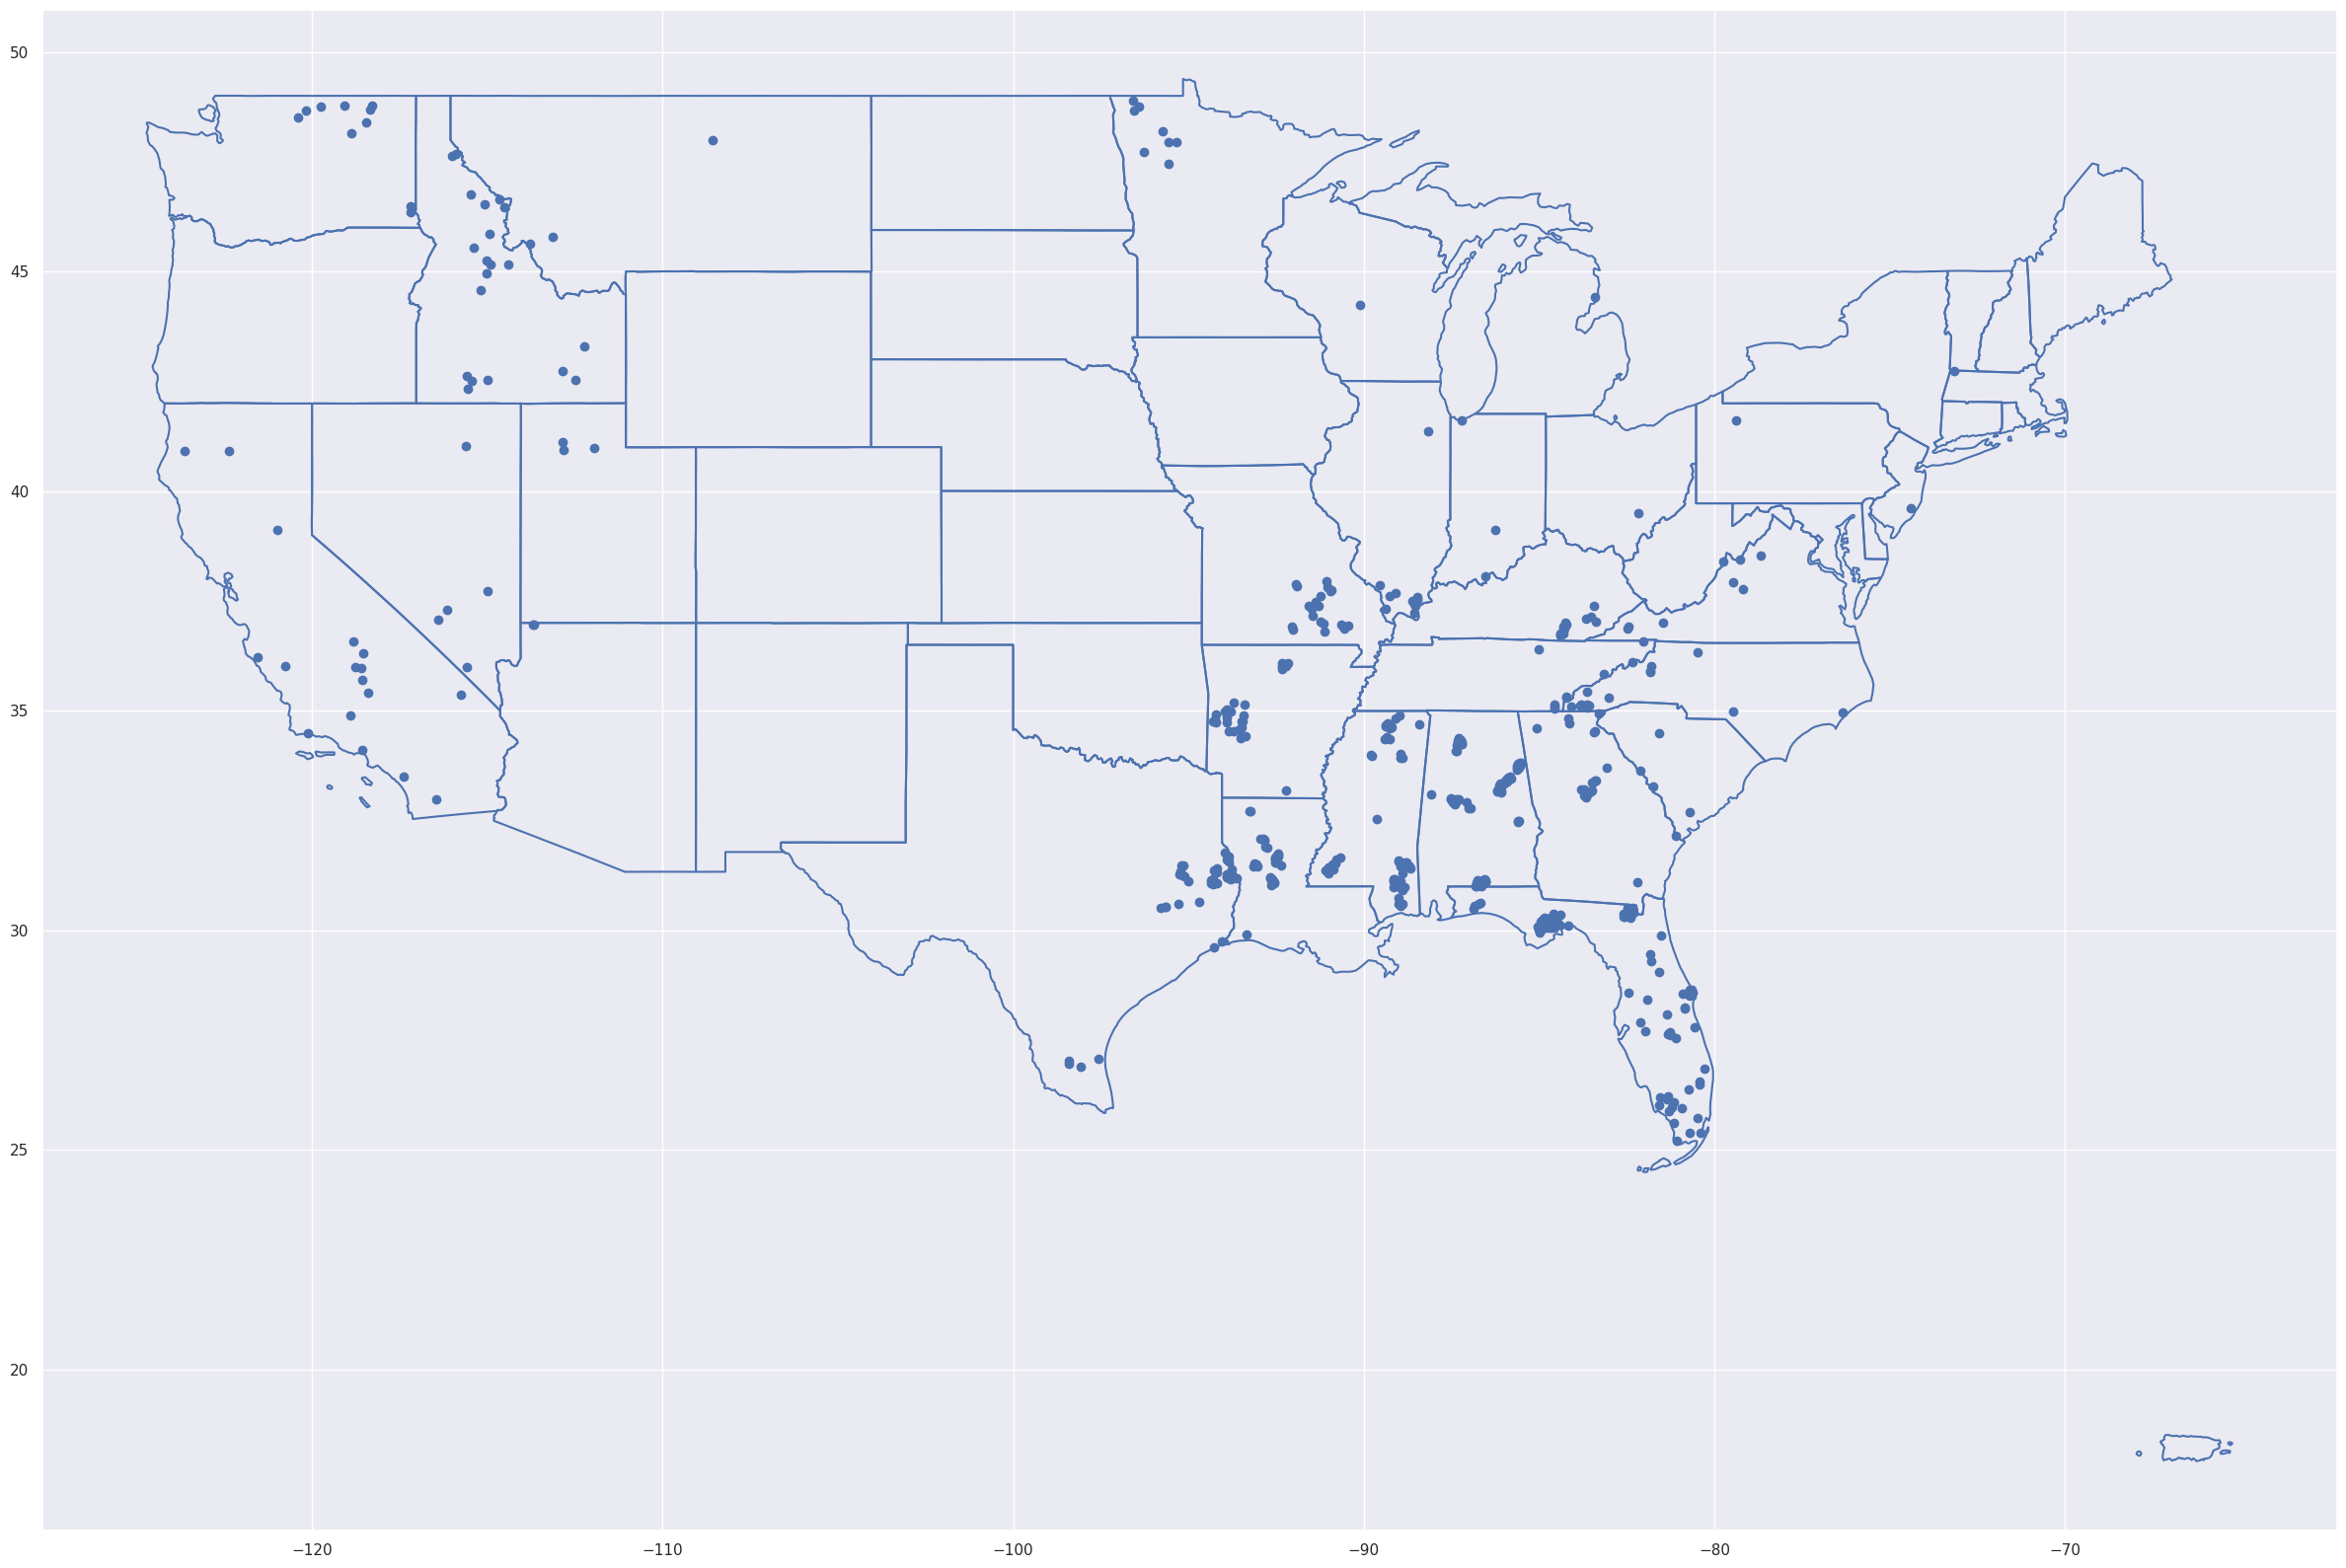

In [14]:
ax = states.boundary.plot(figsize=(30,30))
fires.plot(ax=ax)

<Axes: >

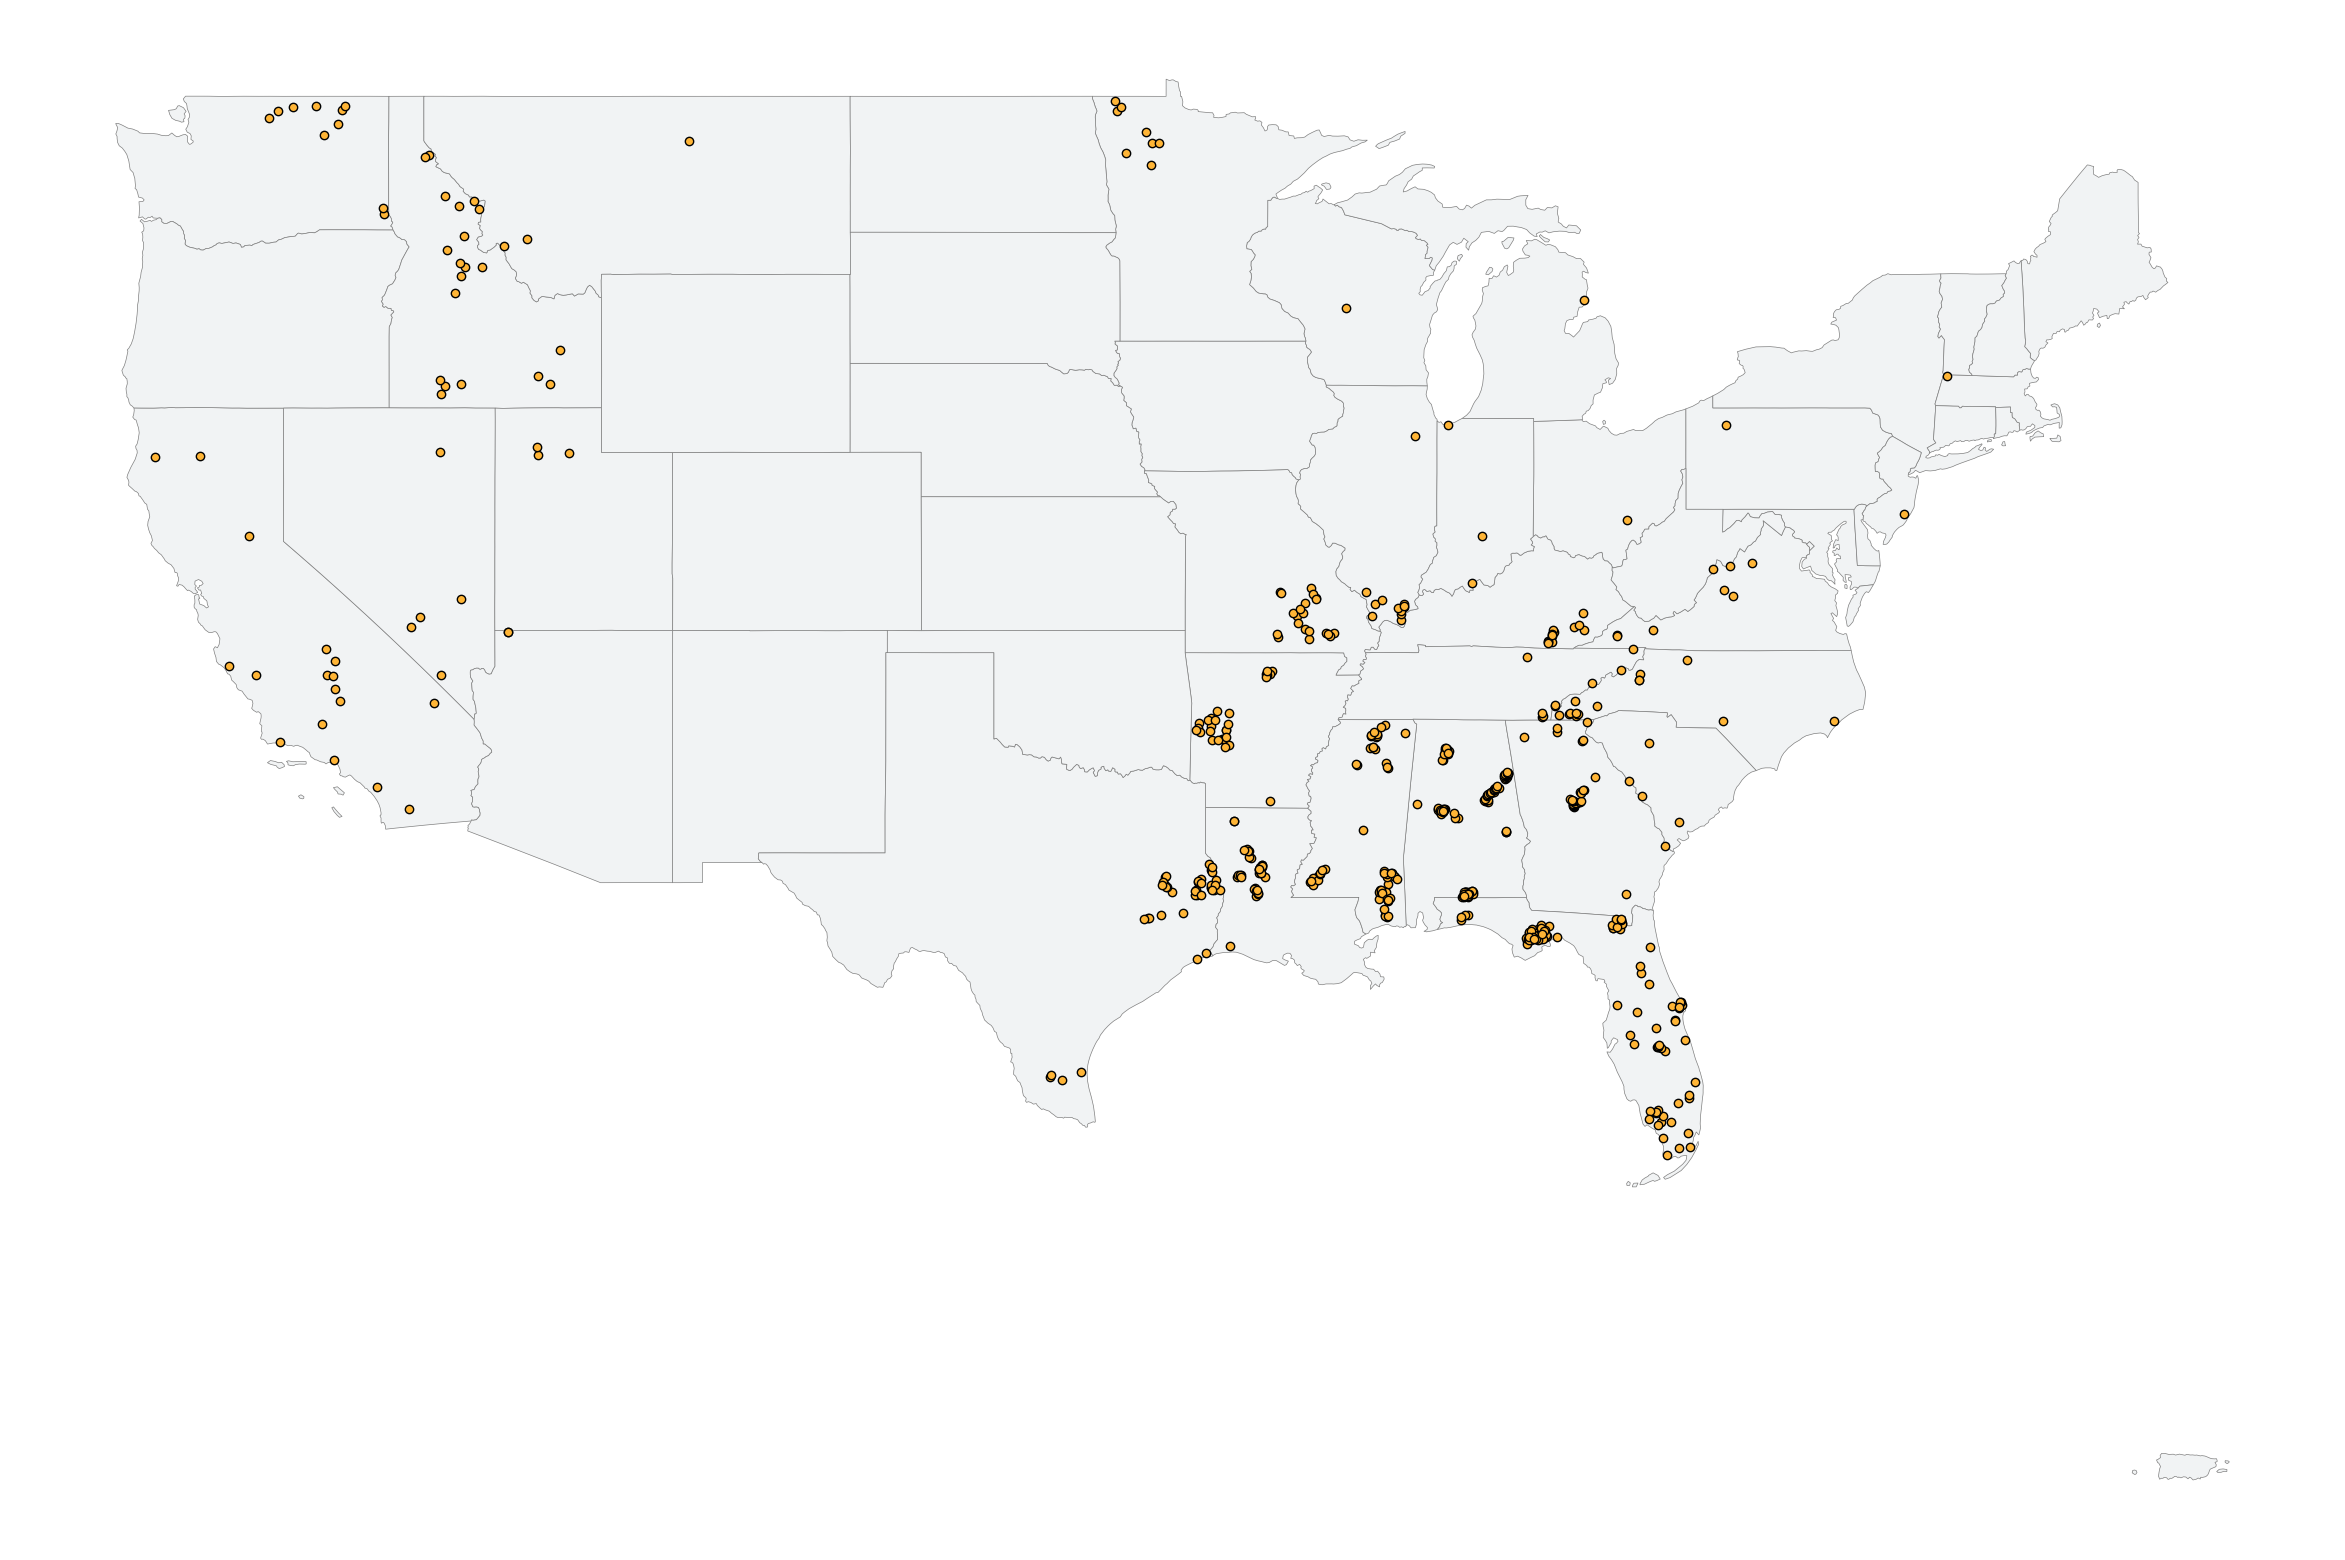

In [15]:
# ALternative gspatial_plot code
ax = gsp.shapeplot(states, figsize=(30,30))
gsp.pointplot(fires, ax=ax)

<Axes: >

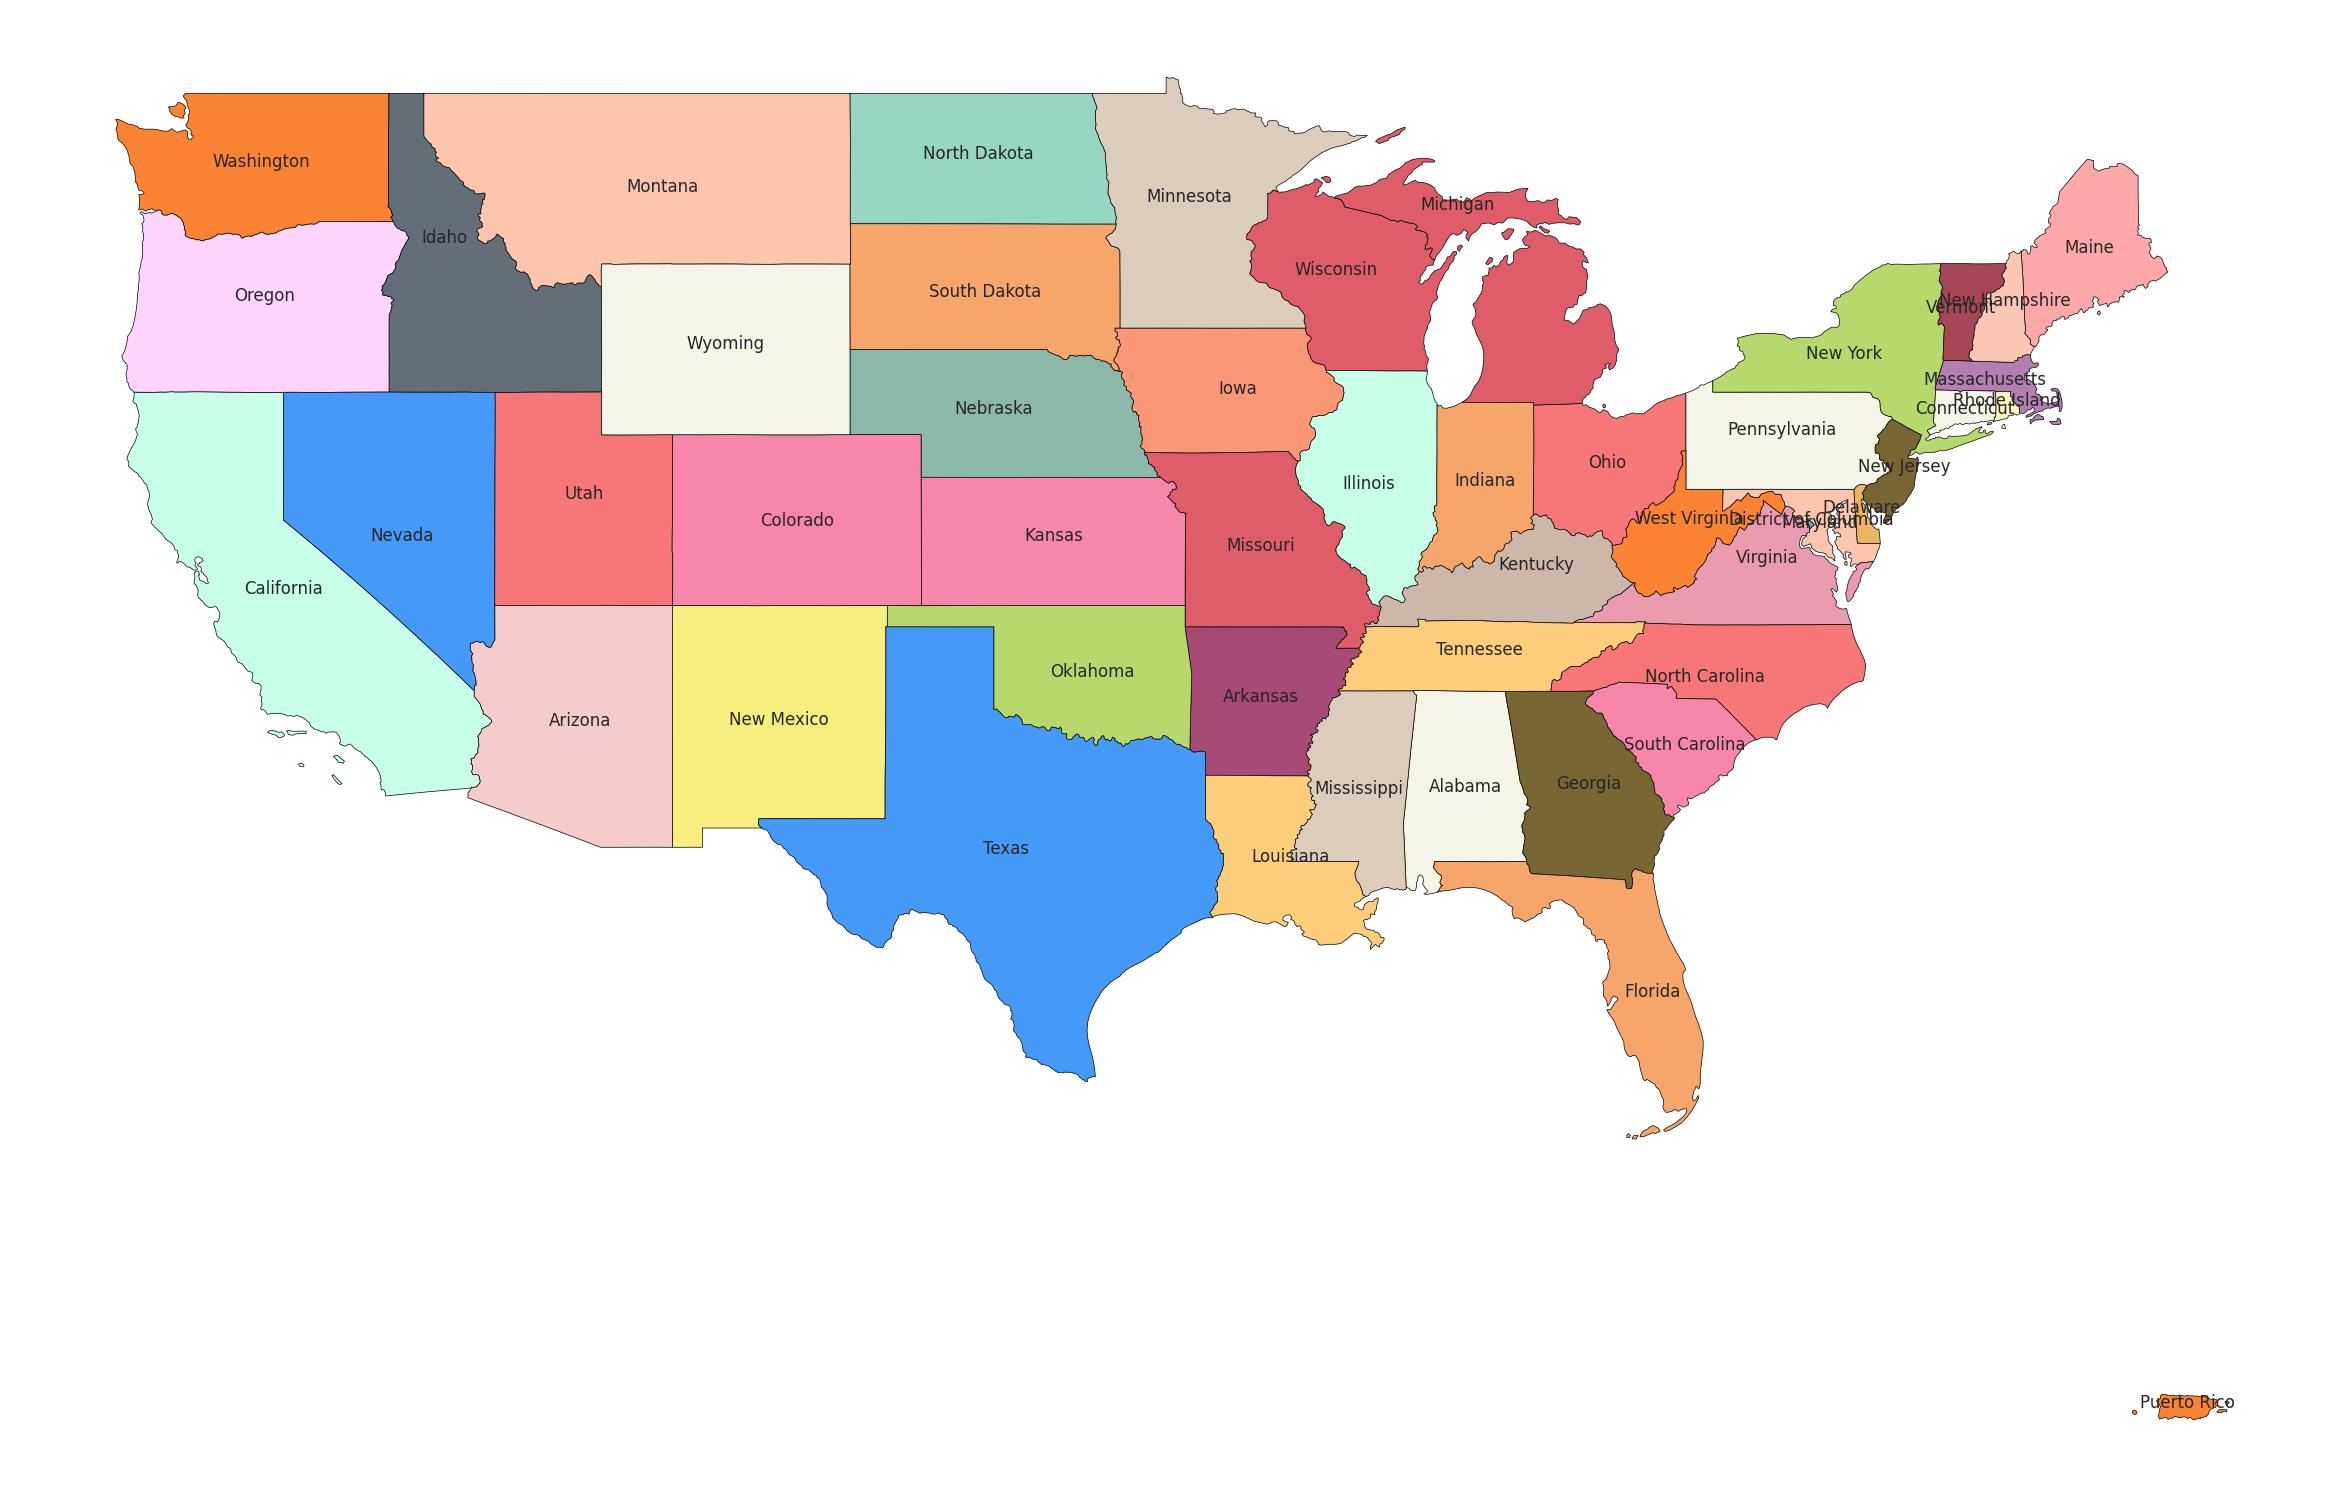

In [16]:
# get the map
gsp.randommap(states, seed=3, annot=True, annot_column="NAME", figsize=(30,30))

In [21]:
# states_points = states.copy()
# states_points["geometry"] = states_points.representative_point()

In [20]:
# states_points

In [22]:
# states_points.info()

### Task 1: Do a spatial join on two datasets such that each fire occurrence has state information (Look for sjoin in geopandas documentation)

**Sol: sjoin(fires, states, how="left", predicate="intersects")**

In [17]:
# left index
fires.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'intersects',
 'overlaps',
 'touches',
 'within'}

**within** would result in only fires that are fully contained within a state geometry being included in the output, and each of those fires would be assigned the attributes of the containing state.

**intersects** will match any fire occurrence that intersects with a state polygon. This will ensure that each fire occurrence has state information.

In [18]:
# Perform spatial join
fires_with_states = sjoin(fires, states, how="left", predicate="intersects")

In [19]:
# Print the resulting GeoDataFrame
fires_with_states

,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,...,index_right,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
0,526496,AL3276508694720210320,Initial,802003720210313,802003720210329,-970,70,9999,9999,32.776,...,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154
1,526497,AL3279308700220211120,Initial,B16SDB20211115_30m,A16SDB20211123_30m,-970,80,9999,9999,32.785,...,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154
2,526498,AL3290408705120210321,Initial,B16SDB20210320_30m,B16SDB20210402_30m,-970,10,9999,9999,32.911,...,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154
3,526499,AL3314708607620210419,Initial,A16SEB20200509_30m,B16SEB20210509_30m,-970,20,9999,9999,33.151,...,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154
4,526500,AL3315508618420211119,Initial,B16SEB20201120_30m,B16SEB20211125_30m,-970,90,9999,9999,33.156,...,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,527038,WA4828511853120210713,Extended,804402620210711,804402620220714,-970,50,308,590,48.372,...,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850
543,527039,WA4856812048820210708,Extended,804502620210702,904502620220729,-970,20,262,525,48.505,...,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850
544,527040,MT4568311385420210708,Extended,804102820210706,904102820220717,-970,55,315,600,45.624,...,27,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832
545,527041,WA4855212019420210716,Extended,804502620210702,804502620220806,-970,60,252,480,48.672,...,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850


In [20]:
fires_with_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   OBJECTID             547 non-null    int64              
 1   FIRE_ID              547 non-null    object             
 2   ASMNT_TYPE           547 non-null    object             
 3   PRE_ID               535 non-null    object             
 4   POST_ID              547 non-null    object             
 5   NODATA_THRESHOLD     547 non-null    int64              
 6   LOW_THRESHOLD        547 non-null    int64              
 7   MODERATE_THRESHOLD   547 non-null    int64              
 8   HIGH_THRESHOLD       547 non-null    int64              
 9   LATITUDE             547 non-null    float64            
 10  LONGITUDE            547 non-null    float64            
 11  FIRE_TYPE            547 non-null    object             
 12  FIRE_NAME     

In [21]:
columns_of_interest=['LATITUDE','LONGITUDE','FIRE_TYPE','FIRE_NAME','ALAND','AWATER','NAME','IG_DATE','ACRES','geometry','STATEFP']

In [22]:
final_fires_with_states=fires_with_states[columns_of_interest]

In [23]:
final_fires_with_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   LATITUDE   547 non-null    float64            
 1   LONGITUDE  547 non-null    float64            
 2   FIRE_TYPE  547 non-null    object             
 3   FIRE_NAME  547 non-null    object             
 4   ALAND      547 non-null    int64              
 5   AWATER     547 non-null    int64              
 6   NAME       547 non-null    object             
 7   IG_DATE    547 non-null    datetime64[ns, UTC]
 8   ACRES      547 non-null    int64              
 9   geometry   547 non-null    geometry           
 10  STATEFP    547 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), geometry(1), int64(3), object(4)
memory usage: 51.3+ KB


<Axes: >

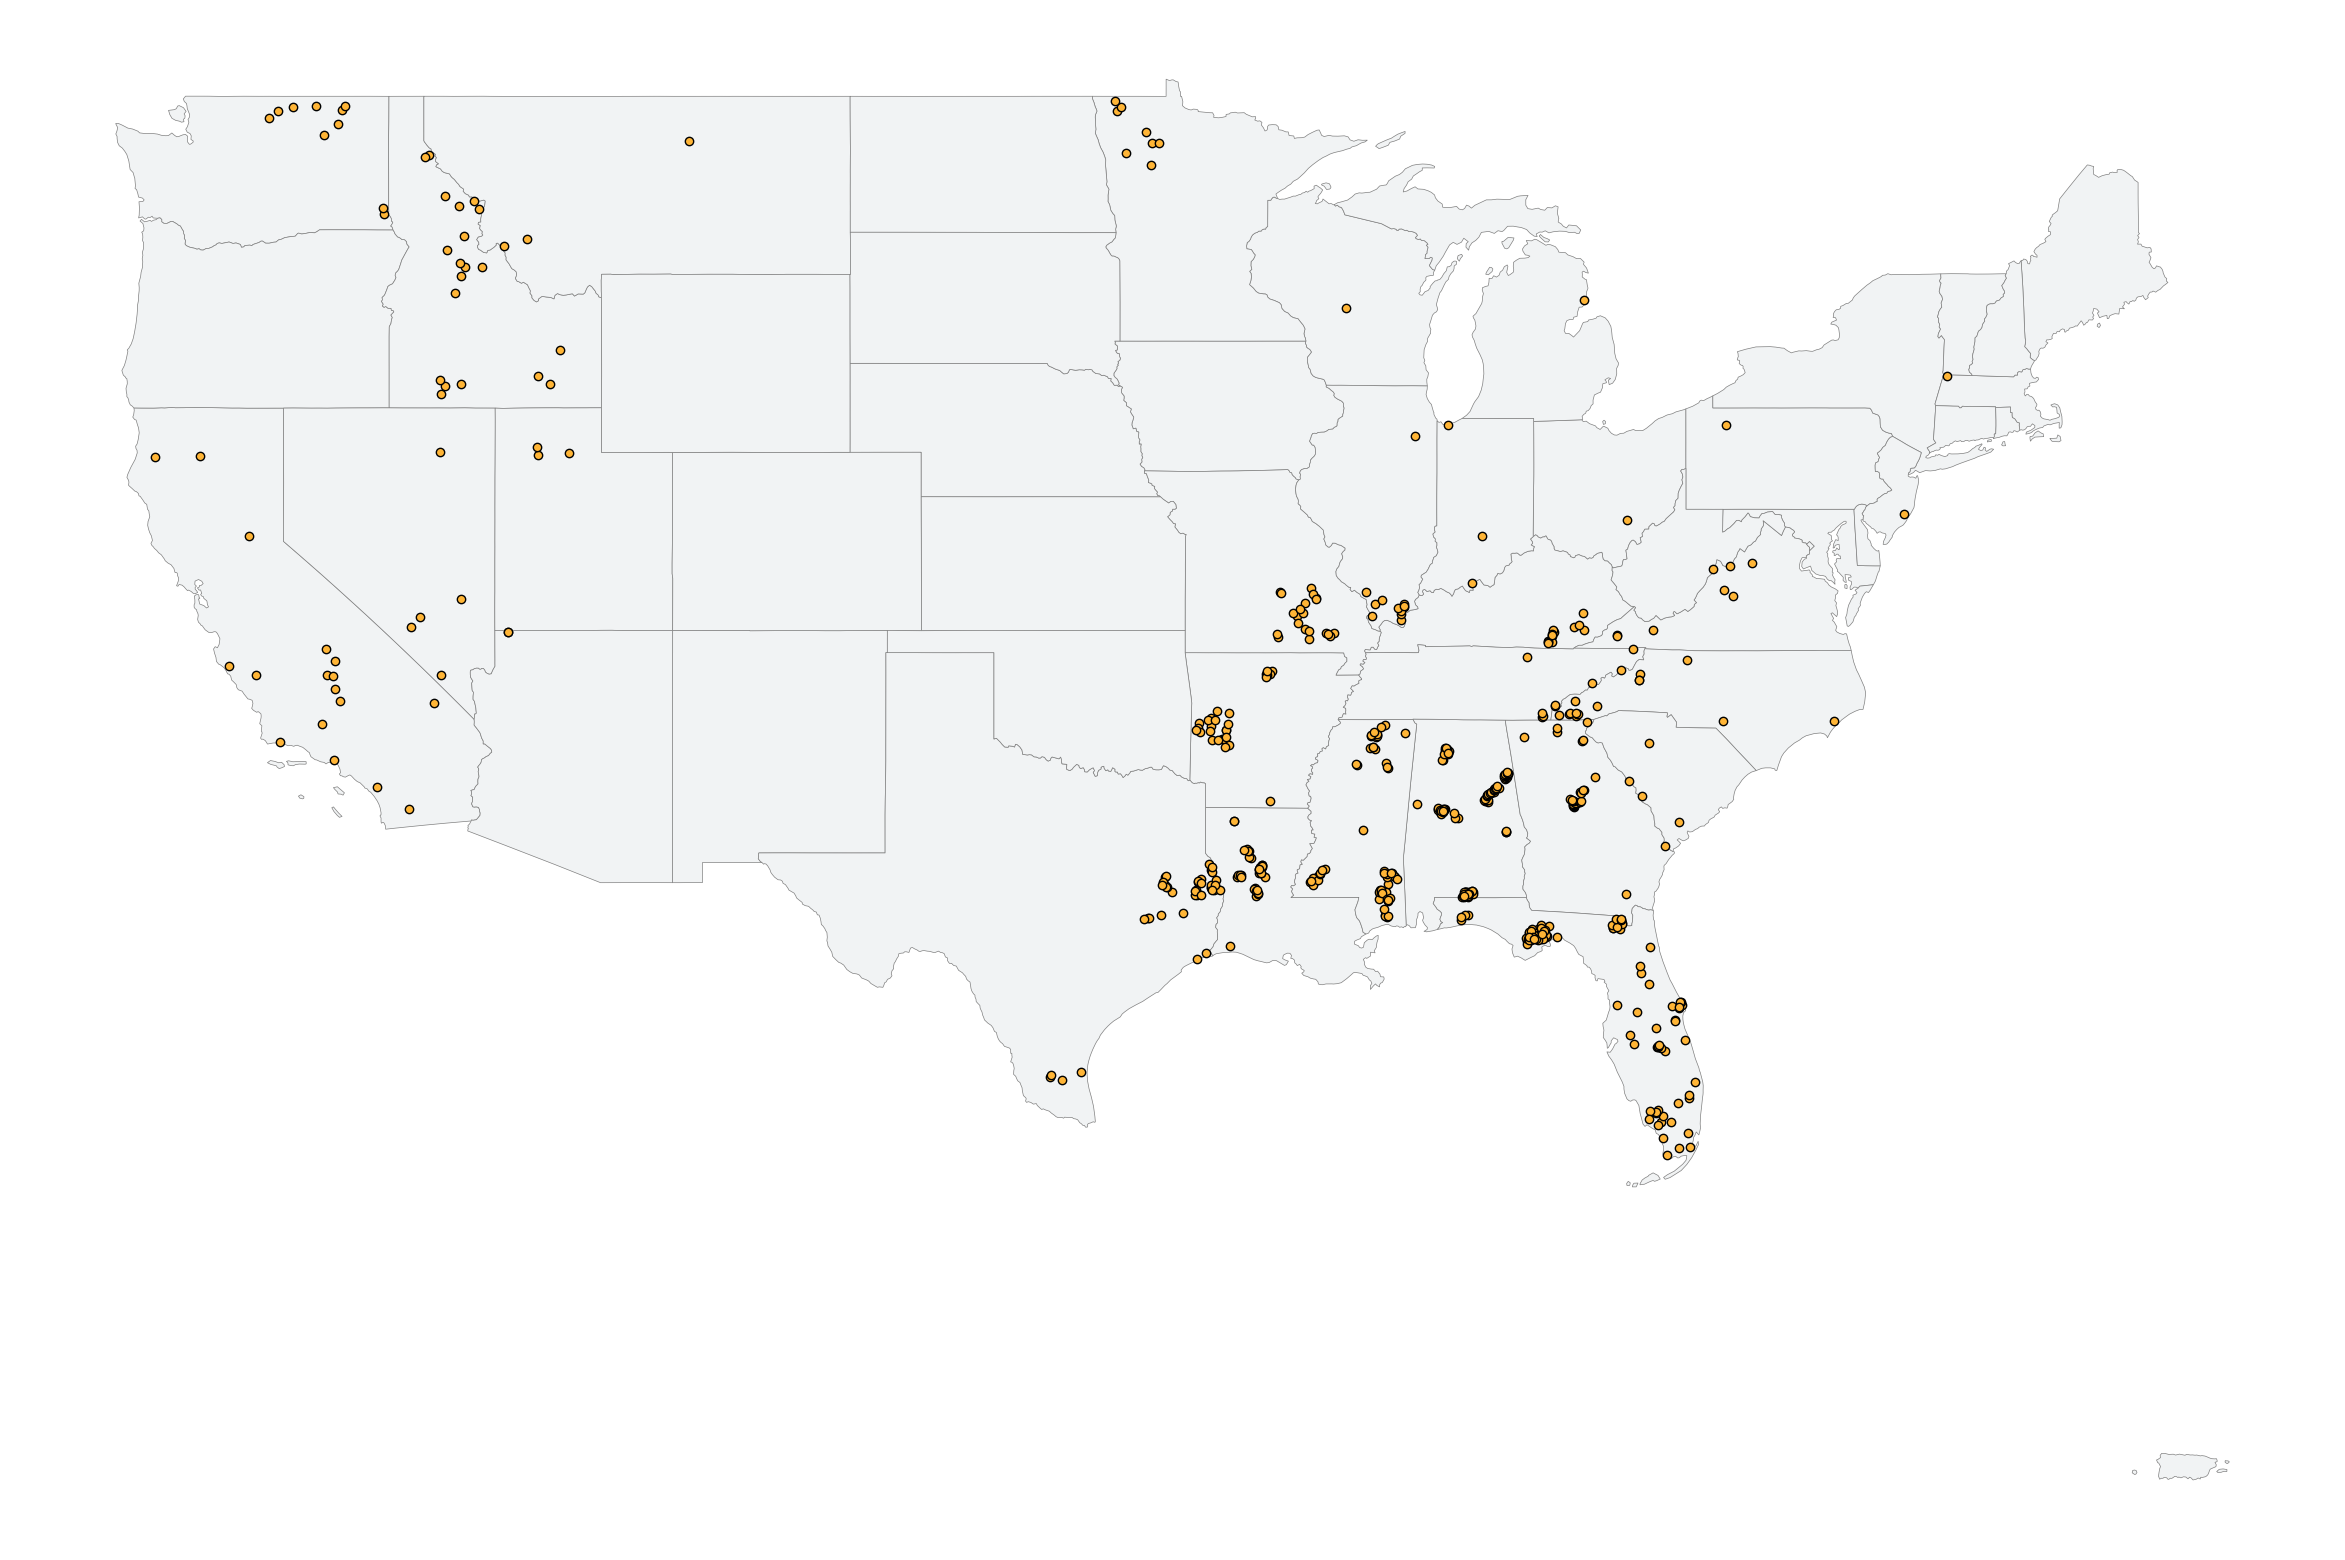

In [24]:
ax = gsp.shapeplot(states, figsize=(30,30))
gsp.pointplot(final_fires_with_states, ax=ax)

### Task 2: Which state had the most number of fires?

**Sol: Alabama**

**reset_index** is used to reset the index of the resulting DataFrame after the groupby operation. By default, when a groupby operation is performed, the resulting object has a multi-level index (with the grouping columns as the levels of the index).

Here, after grouping by 'NAME', the resulting Series object has 'NAME' as the index and 'num_fires' as the values. reset_index is used to convert this Series object into a DataFrame with 'NAME' and 'num_fires' as columns. Without reset_index, 'NAME' would still be the index of the resulting object.

**num_fires** is a new column name created in the DataFrame fires_with_states using the reset_index() method.

In [25]:
# Group by state and count number of fires
num_fires_in_state = final_fires_with_states.groupby('NAME').size().reset_index(name='num_fires')

In [26]:
num_fires_in_state

,NAME,num_fires
0,Alabama,95
1,Arizona,2
2,Arkansas,28
3,California,17
4,Florida,92
5,Georgia,28
6,Idaho,20
7,Illinois,12
8,Indiana,3
9,Kentucky,13


In [27]:
# Sort by number of fires in descending order
num_fires_in_state_sorted = num_fires_in_state.sort_values('num_fires', ascending=False)

In [28]:
# Print state with most number of fires
print('State with the most number of fires:', num_fires_in_state_sorted.iloc[0]['NAME'])

State with the most number of fires: Alabama


### Task 3: Which state had the least number of fires?

**Sol: Wisconsin, Pennsylvania, Ohio, New Jersey, Massachusetts, Michigan**

In [29]:
# Sort by number of fires in ascending order
num_fires_in_state_sorted = num_fires_in_state.sort_values('num_fires')
# Find the minimum number of fires
min_num_fires = num_fires_in_state_sorted['num_fires'].min()
print(min_num_fires)

1


In [31]:
# Print states with the least number of fires
print('States with the least number of fires:')
print(num_fires_in_state_sorted.loc[num_fires_in_state_sorted['num_fires'] == min_num_fires]['NAME'].tolist())

States with the least number of fires:
['Wisconsin', 'Pennsylvania', 'Ohio', 'New Jersey', 'Massachusetts', 'Michigan']


### Task 4: Is there any relationship between number of fires vs total water area (AWATER)?

**Sol: Slight relation**

In [34]:
# we can find the correlation between num_fires in each state and and its water area 
# by taking a new df 'states_with_fires' (add num_fires to states) into consideration 
states_with_num_fires = states.merge(num_fires_in_state[['NAME', 'num_fires']], on='NAME', how='left')
# assuming the data is not missing, we impute the remaining states' num_fires with zero meaning they had no fires 
states_with_num_fires['num_fires'] = states_with_num_fires['num_fires'].fillna(0)
states_with_num_fires

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,num_fires
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",0.0
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"MULTIPOLYGON (((-96.62188 42.77925, -96.57794 ...",0.0
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.77379 39.72220, -75.75323 ...",0.0
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",1.0
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"MULTIPOLYGON (((-80.51989 40.90666, -80.51964 ...",1.0
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"MULTIPOLYGON (((-104.05314 41.11446, -104.0524...",0.0
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",10.0
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",0.0
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.46866 31.89386, -88.46866 ...",95.0
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"MULTIPOLYGON (((-94.61792 36.49941, -94.36120 ...",28.0


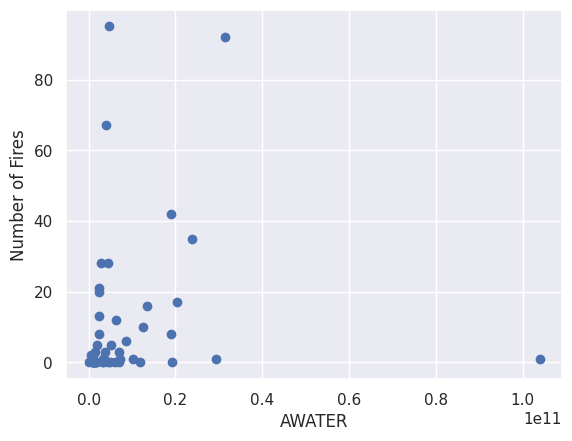

In [35]:
plt.scatter(states_with_num_fires['AWATER'], states_with_num_fires['num_fires'])
plt.xlabel('AWATER')
plt.ylabel('Number of Fires')
plt.show()

This code first creates a boolean mask to identify which values in the arrays are finite, then uses that mask to select only the finite values in the arrays x and y. Finally, it computes the correlation coefficient between x and y using the pearsonr() function.

In [37]:
# Select only finite values
x = states_with_num_fires['AWATER']
y = states_with_num_fires['num_fires']

# Compute correlation
corr, p_value = pearsonr(x, y)
print('Correlation coefficient:', corr)

Correlation coefficient: 0.12309881337883387


*A correlation coefficient of 12% indicates that there is some positive linear relationship between the number of fires and water area, but it is not a very strong relationship. This means that as water area increases, the number of fires tends to increase slightly, but there may be other factors that also influence the occurrence of fires, and the effect of water area on fires may be relatively small.*

### Task 5: Plot a heatmap of fires (You can use gspatial-plot or geopandas or any other library)

In [39]:
fires_by_state = final_fires_with_states.groupby('STATEFP').agg({'ACRES': 'sum'})
fires_by_state

,ACRES
STATEFP,
01,123042
04,3508
05,68282
06,280639
12,297722
13,33972
16,253919
17,13645
18,3100


In [48]:
states_with_fires = states.merge(fires_by_state, on='STATEFP', how='left')
states_with_fires

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,ACRES
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",NaN
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"MULTIPOLYGON (((-96.62188 42.77925, -96.57794 ...",NaN
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.77379 39.72220, -75.75323 ...",NaN
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",1037.0
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"MULTIPOLYGON (((-80.51989 40.90666, -80.51964 ...",586.0
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"MULTIPOLYGON (((-104.05314 41.11446, -104.0524...",NaN
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",279740.0
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",NaN
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.46866 31.89386, -88.46866 ...",123042.0
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"MULTIPOLYGON (((-94.61792 36.49941, -94.36120 ...",68282.0


<Axes: >

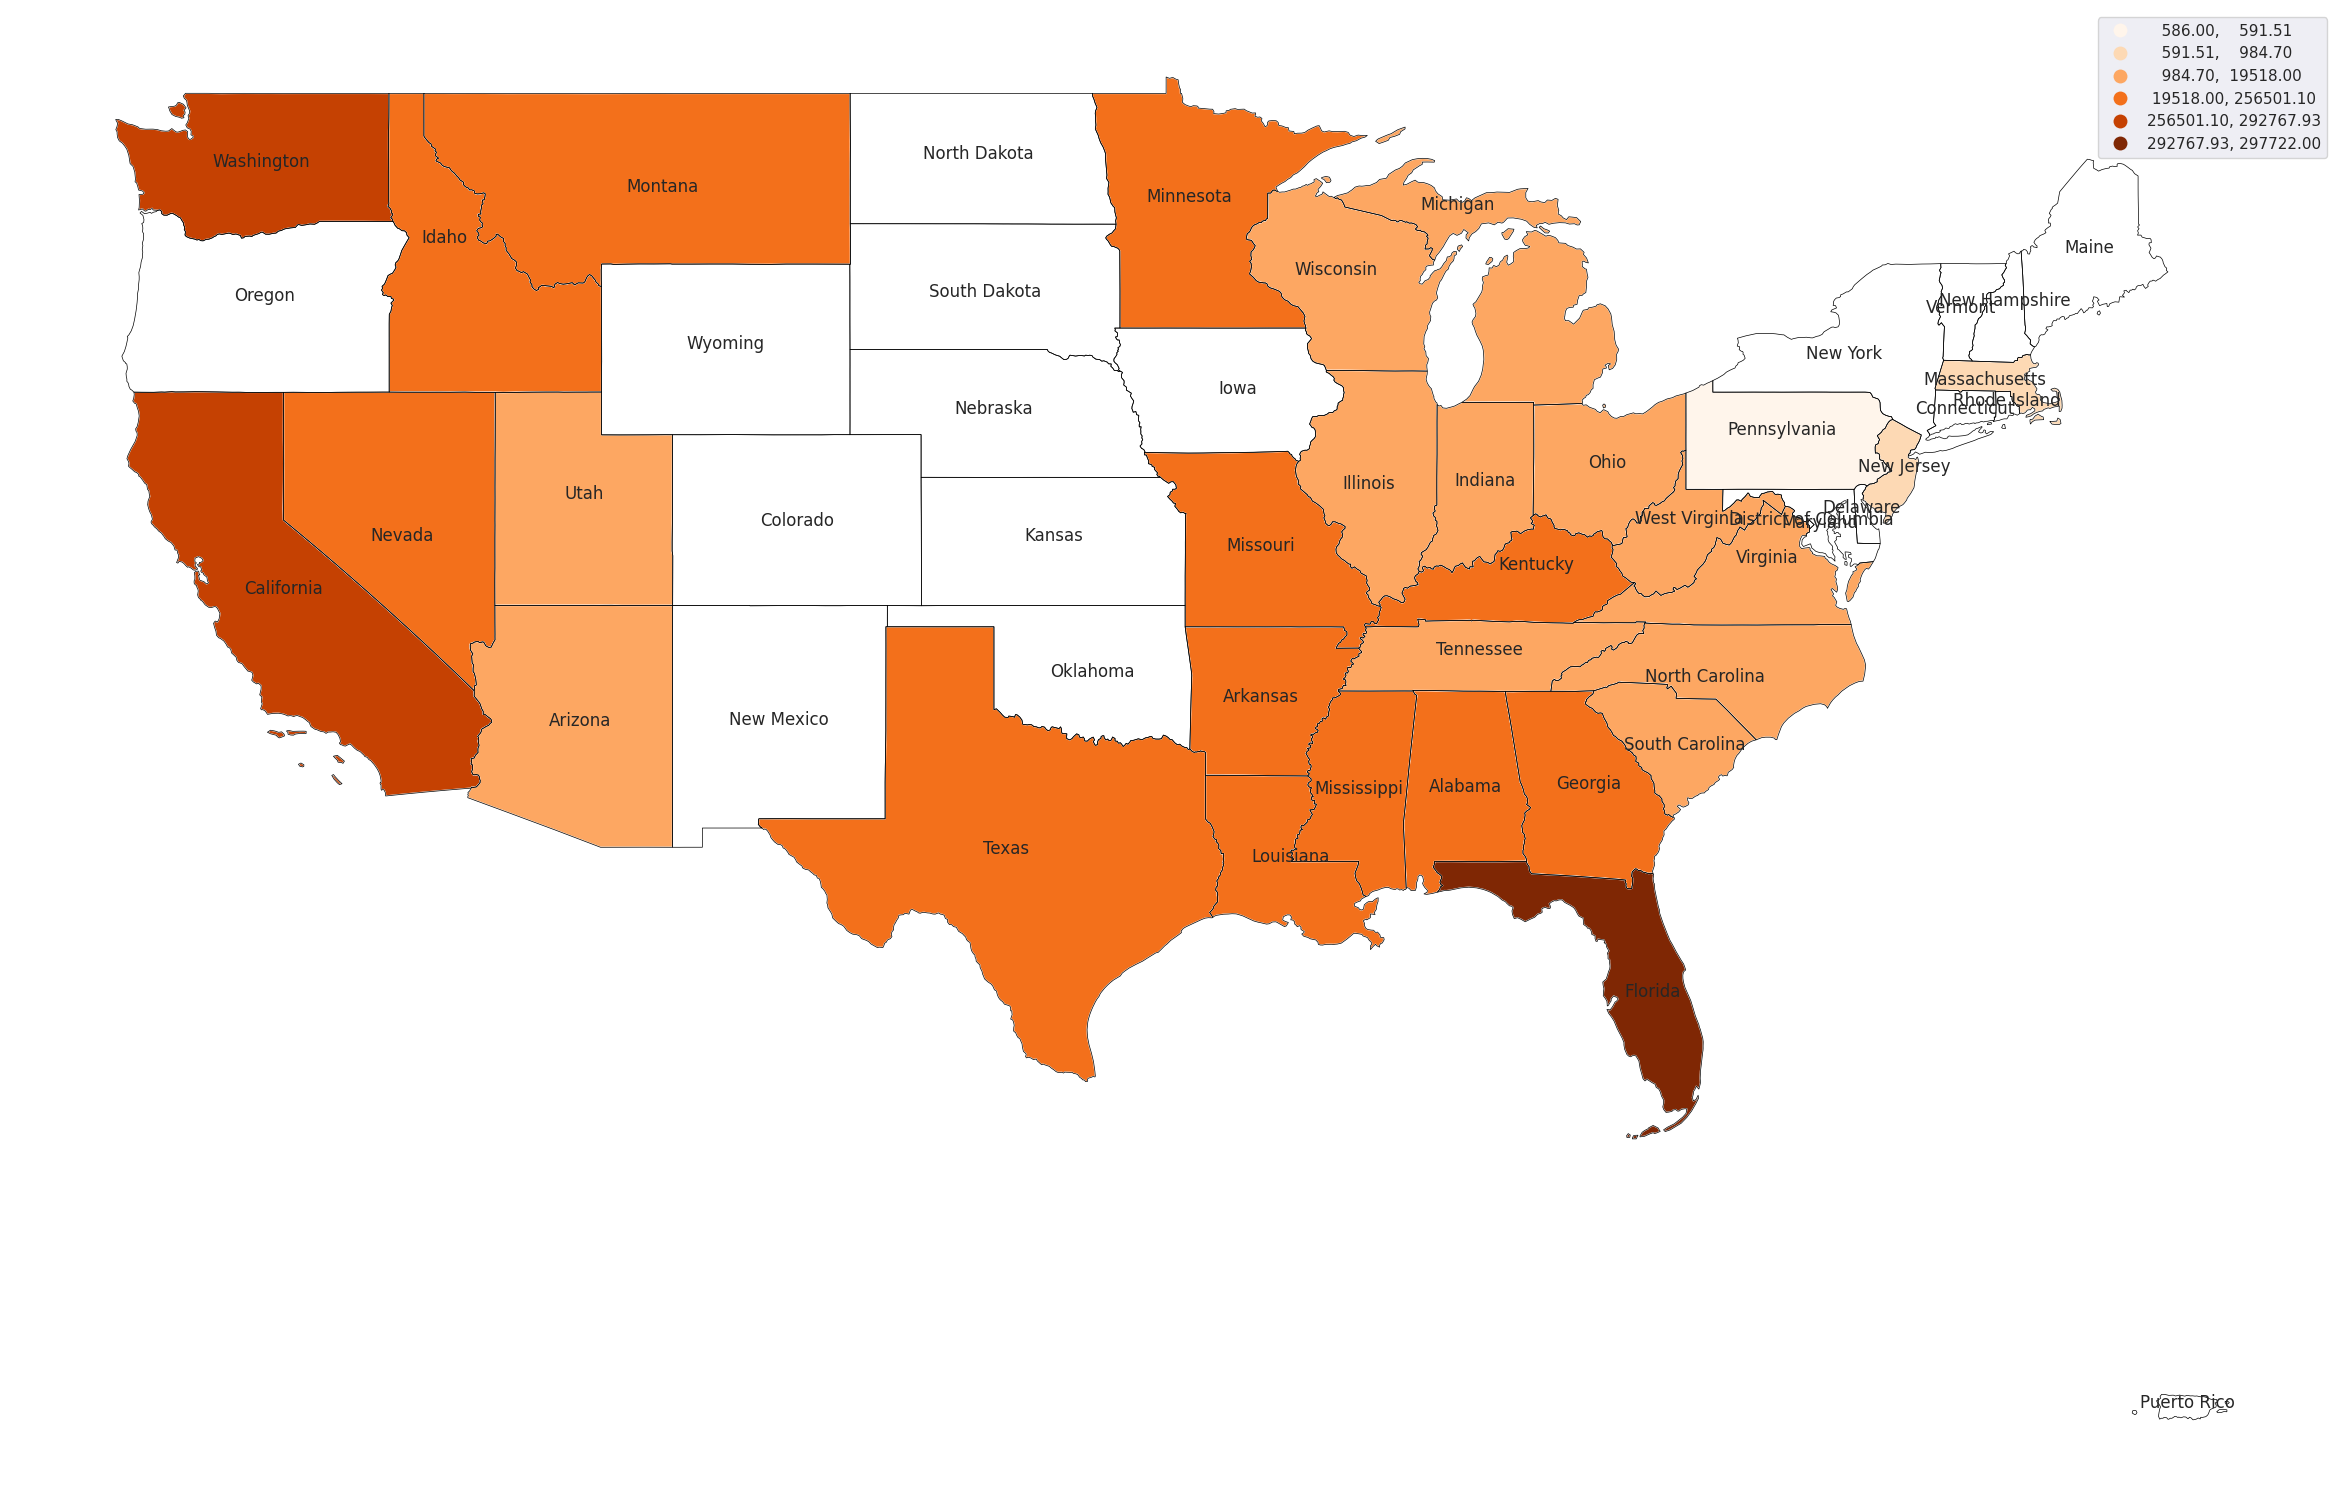

In [66]:
gsp.heatmap(states_with_fires, 'ACRES', cmap='Oranges', annot=True, annot_column="NAME", figsize=(30,30))

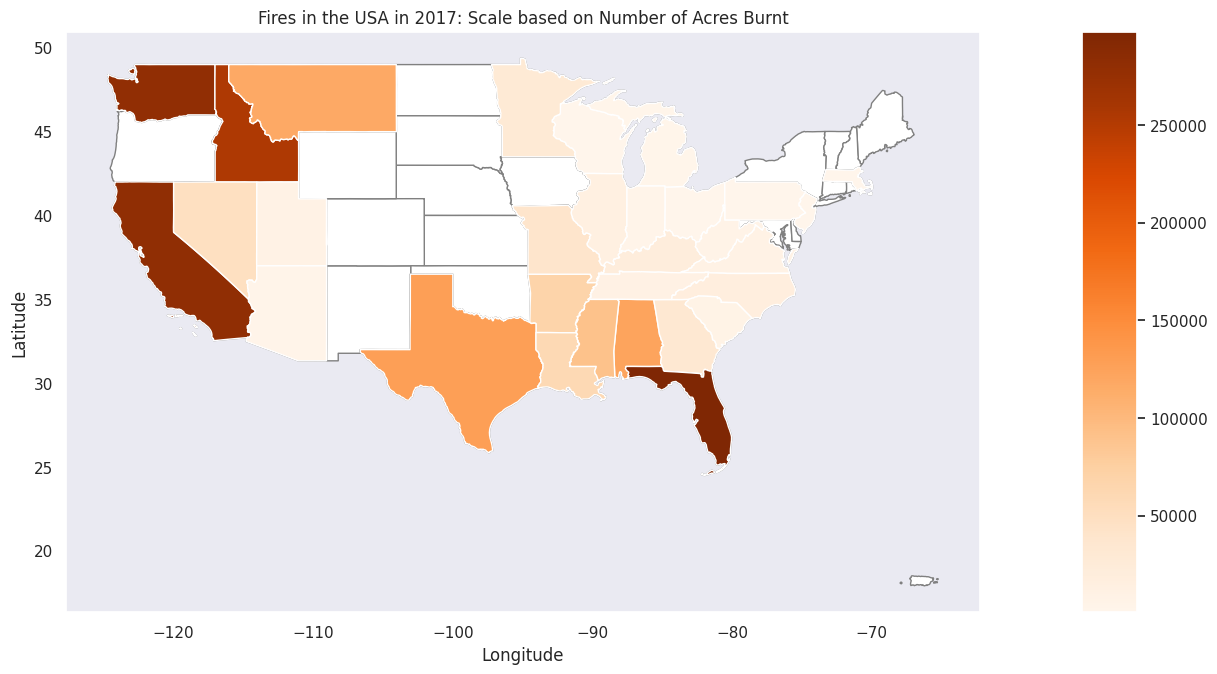

In [52]:
# with geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

states.plot(ax=ax, color='white', edgecolor='gray')
g = states_with_fires.plot(column='ACRES', cmap="Oranges", ax=ax, markersize=10, legend=True, cax=cax)
g.set_title("Fires in the USA in 2017: Scale based on Number of Acres Burnt")
g.set_xlabel('Longitude')
g.set_ylabel('Latitude')
g.grid(False)
plt.show()

### Task 6: Plot a density map of fire occurrences (You can use gspatial-plot or seaborn or any other library)

In [69]:
# # density map based on number of fire occurences
# gsp.densityplot(states_with_num_fires, clip=True, clip_factor=1.5)

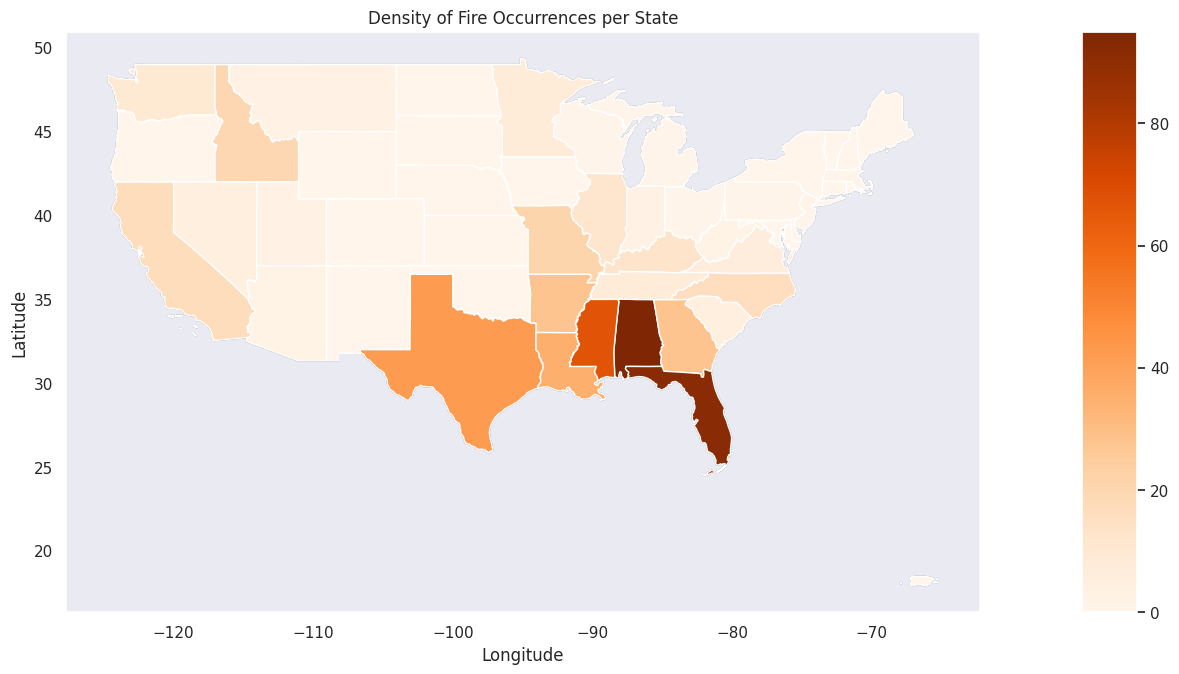

In [64]:
# Plot the fire density on a map of the USA
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

states.plot(ax=ax, color='white', edgecolor='gray')
g = states_with_num_fires.plot(column='num_fires', cmap="Oranges", ax=ax, markersize=10, legend=True, cax=cax)
g.set_title("Density of Fire Occurrences per State")
g.set_xlabel('Longitude')
g.set_ylabel('Latitude')
g.grid(False)
plt.show()

### Task 7: Which state had the highest number of Wildfires? (FIRE_TYPE column)

**Sol: Idaho**

In [70]:
# Count the number of wildfires by state and fire type
wildfires_by_state = fires_with_states.groupby(['STATEFP', 'FIRE_TYPE'])['FIRE_ID'].count()
wildfires_by_state

STATEFP  FIRE_TYPE      
01       Prescribed Fire    93
         Wildfire            2
04       Wildfire            2
05       Prescribed Fire    27
         Wildfire            1
06       Wildfire           17
12       Prescribed Fire    74
         Wildfire           18
13       Prescribed Fire    27
         Wildfire            1
16       Wildfire           20
17       Prescribed Fire    12
18       Prescribed Fire     3
21       Prescribed Fire    10
         Wildfire            3
22       Prescribed Fire    32
         Wildfire            3
25       Wildfire            1
26       Prescribed Fire     1
27       Wildfire            8
28       Prescribed Fire    63
         Wildfire            4
29       Prescribed Fire    20
         Wildfire            1
30       Wildfire            3
32       Wildfire            5
34       Wildfire            1
37       Prescribed Fire    12
         Wildfire            4
39       Prescribed Fire     1
42       Prescribed Fire     1
45       Presc

In [72]:
max_fires_by_type = wildfires_by_state.groupby('FIRE_TYPE').max()
max_fires_by_type

FIRE_TYPE
Prescribed Fire    93
Unknown             1
Wildfire           20
Name: FIRE_ID, dtype: int64

In [84]:
fires.FIRE_TYPE.unique()

array(['Prescribed Fire', 'Wildfire', 'Unknown'], dtype=object)

In [97]:
len(fires.FIRE_ID.unique())

547

In [75]:
# Find the state with the highest number of wildfires for each fire type
max_fires_by_type = wildfires_by_state.reset_index().groupby("FIRE_TYPE").apply(lambda x: x.loc[x["FIRE_ID"].idxmax()])
max_fires_by_type

,STATEFP,FIRE_TYPE,FIRE_ID
FIRE_TYPE,,,
Prescribed Fire,01,Prescribed Fire,93
Unknown,48,Unknown,1
Wildfire,16,Wildfire,20


In [77]:
# Join the state names to the result
result = max_fires_by_type.merge(states[["STATEFP", "NAME"]], on="STATEFP")
result

,STATEFP,FIRE_TYPE,FIRE_ID,NAME
0,01,Prescribed Fire,93,Alabama
1,48,Unknown,1,Texas
2,16,Wildfire,20,Idaho


### Task 8: Which state had the highest number of acres burned? (ACRES)

**Sol: Florida**

*Following logic is based on the assumption that each fire occurence burnt acres of lands that are non-overlapping.*


In [80]:
acres_by_state = final_fires_with_states.groupby('NAME').sum().sort_values(by='ACRES', ascending=False)
acres_by_state.head(1)

/tmp/ipykernel_12763/3256696509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acres_by_state = final_fires_with_states.groupby('NAME').sum().sort_values(by='ACRES', ascending=False)


,LATITUDE,LONGITUDE,ALAND,AWATER,ACRES
NAME,,,,,
Florida,2660.383,-7626.652,12783320535000,2885221312516,297722


In [81]:
# another way to obtain the same answer would be:
acres_burned_by_state = states_with_fires.groupby("NAME")["ACRES"].sum()
acres_burned_by_state

NAME
Alabama                 123042.0
Arizona                   3508.0
Arkansas                 68282.0
California              280639.0
Colorado                     0.0
Connecticut                  0.0
Delaware                     0.0
District of Columbia         0.0
Florida                 297722.0
Georgia                  33972.0
Idaho                   253919.0
Illinois                 13645.0
Indiana                   3100.0
Iowa                         0.0
Kansas                       0.0
Kentucky                 21261.0
Louisiana                59819.0
Maine                        0.0
Maryland                     0.0
Massachusetts              964.0
Michigan                  1751.0
Minnesota                28975.0
Mississippi              90087.0
Missouri                 39664.0
Montana                 116779.0
Nebraska                     0.0
Nevada                   48828.0
New Hampshire                0.0
New Jersey                 605.0
New Mexico                   0.0
New Y

In [82]:
# Find the state with the highest number of acres burned
highest_acres_burned_state = acres_burned_by_state.idxmax()
print(f"The state with the highest number of acres burned is {highest_acres_burned_state}")

The state with the highest number of acres burned is Florida


### Task 9: Which Month had the highest number of fires?

**Sol: March**

In [83]:
# convert the IG_DATE column to datetime
fires['IG_DATE'] = pd.to_datetime(fires['IG_DATE'])

In [84]:
# extract the month from the IG_DATE column
fires['month'] = fires['IG_DATE'].dt.month

In [85]:
fires.month.unique()

array([ 3, 11,  4,  1,  2, 12,  7,  6,  5,  8, 10,  9])

In [86]:
# group by month and count the number of fires
fires_by_month = fires.groupby('month')['FIRE_ID'].count()
fires_by_month

month
1      25
2      55
3     225
4     107
5      37
6      14
7      27
8      14
9       3
10      9
11     20
12     11
Name: FIRE_ID, dtype: int64

In [88]:
# find the month with the highest number of fires
month_with_highest_fires = fires_by_month.idxmax()
print("Month number with the highest number of fires:", month_with_highest_fires)

Month number with the highest number of fires: 3


In [89]:
# convert the month number to its name using the calendar module
month_with_highest_fires_name = calendar.month_name[month_with_highest_fires]

# print the name of the month with the highest number of fires
print("Month with the highest number of fires:", month_with_highest_fires_name)

Month with the highest number of fires: March


### Task 10: Which State had the highest number of fires for the month in question 9?

**Sol: Florida**

In [92]:
final_fires_with_states_filtered = final_fires_with_states[fires_with_states['IG_DATE'].dt.month == month_with_highest_fires]
final_fires_with_states_filtered

,LATITUDE,LONGITUDE,FIRE_TYPE,FIRE_NAME,ALAND,AWATER,NAME,IG_DATE,ACRES,geometry,STATEFP
0,32.776,-86.942,Prescribed Fire,OK COMP 132 D,131174048583,4593327154,Alabama,2021-03-20 00:00:00+00:00,1966,POINT (-86.94711 32.77450),01
2,32.911,-87.058,Prescribed Fire,OK COMP 106 A AND B,131174048583,4593327154,Alabama,2021-03-21 00:00:00+00:00,1313,POINT (-87.05778 32.90670),01
11,33.349,-86.003,Prescribed Fire,TL SHOOTING RANGE B,131174048583,4593327154,Alabama,2021-03-09 00:00:00+00:00,945,POINT (-86.00320 33.34724),01
12,33.349,-86.050,Prescribed Fire,TL TYLER WEST,131174048583,4593327154,Alabama,2021-03-05 00:00:00+00:00,3148,POINT (-86.04595 33.35235),01
21,33.503,-85.842,Prescribed Fire,TL WADE 3,131174048583,4593327154,Alabama,2021-03-06 00:00:00+00:00,1211,POINT (-85.83930 33.50209),01
...,...,...,...,...,...,...,...,...,...,...,...
523,31.287,-95.253,Prescribed Fire,UNNAMED,676653171537,19006305260,Texas,2021-03-11 00:00:00+00:00,7272,POINT (-95.25704 31.28523),48
526,25.222,-81.054,Prescribed Fire,CP3,138949136250,31361101223,Florida,2021-03-08 00:00:00+00:00,8143,POINT (-81.05881 25.22001),12
528,26.899,-98.070,Wildfire,KING,676653171537,19006305260,Texas,2021-03-18 00:00:00+00:00,9793,POINT (-98.07414 26.90091),48
529,30.058,-84.807,Prescribed Fire,BU 83/84/85,138949136250,31361101223,Florida,2021-03-11 00:00:00+00:00,10582,POINT (-84.80354 30.05791),12


In [93]:
# Group by STATEFP and sum ACRES
final_fires_with_states_filtered_by_month = final_fires_with_states_filtered.groupby('STATEFP').agg({'ACRES': 'sum'}).reset_index()

In [94]:
final_fires_with_states_filtered_by_month

,STATEFP,ACRES
0,01,41126
1,05,62943
2,12,88163
3,13,24499
4,17,10318
5,18,959
6,21,15086
7,22,23608
8,27,20814
9,28,46729


In [95]:
# Sort by ACRES in descending order and take the first row
state_with_highest_fires_in_month = final_fires_with_states_filtered_by_month.sort_values('ACRES', ascending=False).iloc[0]['STATEFP']

# Get the name of the state
name_of_state_with_highest_fires_in_month = fires_with_states[fires_with_states['STATEFP'] == state_with_highest_fires_in_month]['NAME'].values[0]

print(f"The state with the highest number of fires in {month_with_highest_fires_name} is {name_of_state_with_highest_fires_in_month}")

The state with the highest number of fires in March is Florida
